In [2]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
from matplotlib.ticker import FormatStrFormatter

In [3]:
caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


In [4]:
def prepare_hh_dict(mem):
    hh_dict = {}
    if mem == "16KB":
        hh_dict["caida-500w"] = (31.05, 16.41, 192.12, "cs")
        hh_dict["caida-250w"] = (17.26, 10.83, 181.92, "cs")
        hh_dict["caida-125w"] = (7.75, 6.28, 71.08, "cs")
        hh_dict["caida-50w"]  = (4.31, 6.59, 97.52, "cm")
        hh_dict["zipf2-250w"] = (11.02, 10.61, 129.77, "cs")
        hh_dict["zipf2-125w"] = (6.75, 6.03, 142.88, "cs")
        hh_dict["zipf2-50w"]  = (6.35, 6.40, 144.15, "cm")
        hh_dict["zipf1-250w"] = (16.38, 13.27, 98.01, "cs")
        hh_dict["zipf1-125w"] = (6.11, 8.28, 69.84, "cm")
        hh_dict["zipf1-50w"]  = (2.78, 8.90, 52.66, "cm")
    elif mem == "32KB":
        hh_dict["caida-500w"] = (11.49, 7.32, 100.92, "cs")
        hh_dict["caida-250w"] = (5.92, 4.44, 75.71, "cs")
        hh_dict["caida-125w"] = (2.88, 2.71, 34.63, "cs")
        hh_dict["caida-50w"]  = (1.07, 2.07, 42.20, "cm")
        hh_dict["zipf2-250w"] = (3.81, 5.16, 77.63,  "cm")
        hh_dict["zipf2-125w"] = (2.93, 3.15, 72.63, "cm")
        hh_dict["zipf2-50w"]  = (2.41, 2.99, 63.39,  "cm")
        hh_dict["zipf1-250w"] = (4.48, 6.60, 43.90,  "cm")
        hh_dict["zipf1-125w"] = (1.28, 3.39, 20.86, "cm")
        hh_dict["zipf1-50w"]  = (0.15, 2.08, 14.42, "cm")
    elif mem == "64KB":
        hh_dict["caida-500w"] = (3.76, 3.43, 54.25, "cs")
        hh_dict["caida-250w"] = (2.11, 1.70, 26.64, "cs")
        hh_dict["caida-125w"] = (1.03, 1.72, 15.92, "cm")
        hh_dict["caida-50w"]  = (0.27, 0.47, 12.22, "cm")
        hh_dict["zipf2-250w"] = (1.51, 1.27, 50.20, "cs")
        hh_dict["zipf2-125w"] = (1.02, 1.31, 30.92, "cm")
        hh_dict["zipf2-50w"]  = (0.70, 1.20, 12.36, "cm")
        hh_dict["zipf1-250w"] = (1.42, 3.41, 16.76, "cm")
        hh_dict["zipf1-125w"] = (0.41, 1.56, 7.23, "cm")
        hh_dict["zipf1-50w"]  = (0.04, 0.54, 12.09, "cm")
    elif mem == "128KB":
        hh_dict["caida-500w"] = (1.16, 1.35, 18.70, "cm")
        hh_dict["caida-250w"] = (0.84, 1.14, 6.71,  "cm")
        hh_dict["caida-125w"] = (0.31, 0.64, 4.19,  "cm")
        hh_dict["caida-50w"]  = (0.07, 0.19, 4.10, "cm")
        hh_dict["zipf2-250w"] = (0.56, 0.43, 20.15, "cs")
        hh_dict["zipf2-125w"] = (0.43, 0.28, 11.18,  "cs")
        hh_dict["zipf2-50w"]  = (0.24, 0.68, 6.66,   "cm")
        hh_dict["zipf1-250w"] = (0.22, 0.78, 4.19,  "cm")
        hh_dict["zipf1-125w"] = (0.05, 0.43, 3.08, "cm")
        hh_dict["zipf1-50w"]  = (0.02, 0.13, 2.75, "cm")
    elif mem == "256KB":
        hh_dict["caida-500w"] = (0.44, 0.75, 7.14, "cm")
        hh_dict["caida-250w"] = (0.21, 0.58, 2.74, "cm")
        hh_dict["caida-125w"] = (0.09, 0.20, 2.11,  "cm")
        hh_dict["caida-50w"]  = (0.01, 0.04, 1.07, "cm")
        hh_dict["zipf2-250w"] = (0.21, 0.13, 5.83,  "cs")
        hh_dict["zipf2-125w"] = (0.16, 0.13, 4.63,  "cs")
        hh_dict["zipf2-50w"]  = (0.07, 0.10, 4.40,   "cm")
        hh_dict["zipf1-250w"] = (0.01, 0.14, 3.18,  "cm")
        hh_dict["zipf1-125w"] = (0, 0.01, 0.69, "cm")
        hh_dict["zipf1-50w"]  = (0, 0.08, 0.18, "cm")
    elif mem == "512KB":
        hh_dict["caida-500w"] = (0.12, 0.20, 3.62, "cm")
        hh_dict["caida-250w"] = (0.04, 0.12, 0.84, "cm")
        hh_dict["caida-125w"] = (0.01, 0.05, 0.23,  "cm")
        hh_dict["caida-50w"]  = (0.01, 0.01, 0.64,  "cm")
        hh_dict["zipf2-250w"] = (0.08, 0.06, 1.99,"cs")
        hh_dict["zipf2-125w"] = (0.04, 0.04, 1.59,  "cm")
        hh_dict["zipf2-50w"]  = (0.02, 0.04, 2.17,  "cm")
        hh_dict["zipf1-250w"] = (0, 0.02, 0.82, "cm")
        hh_dict["zipf1-125w"] = (0, 0.01, 1.28, "cm")
        hh_dict["zipf1-50w"]  = (0, 0, 0.03, "cm")
        
    return hh_dict

In [5]:
def prepare_fsd_dict(mem):
    fsd_dict = {}
    if mem == "16KB":
        fsd_dict["caida-500w"] = (1.82, 1.54, "cs")
        fsd_dict["caida-250w"] = (1.54, 1.36, "cs")
        fsd_dict["caida-125w"] = (1.31, 1.15, "cs")
        fsd_dict["caida-50w"]  = (1.02,  0.90, "cs")
        fsd_dict["zipf2-250w"] = (1.59, 1.36, "cs")
        fsd_dict["zipf2-125w"] = (1.37, 1.17, "cs")
        fsd_dict["zipf2-50w"]  = (1.28, 0.89, "cs")
        fsd_dict["zipf1-250w"] = (1.37, 1.39, "cm")
        fsd_dict["zipf1-125w"] = (1.02, 1.12, "cm")
        fsd_dict["zipf1-50w"]  = (0.48, 0.66, "cm")
    elif mem == "32KB":
        fsd_dict["caida-500w"] = (1.61, 1.31,  "cs")
        fsd_dict["caida-250w"] = (1.35, 1.18,  "cs")
        fsd_dict["caida-125w"] = (1.05, 1.03, "cs")
        fsd_dict["caida-50w"]  = (0.75, 0.80,"cm")
        fsd_dict["zipf2-250w"] = (1.32, 1.22, "cs")
        fsd_dict["zipf2-125w"] = (1.11, 1.02,  "cs")
        fsd_dict["zipf2-50w"]  = (1.05, 0.78,  "cs")
        fsd_dict["zipf1-250w"] = (1.04, 1.12,  "cm")
        fsd_dict["zipf1-125w"] = (0.61, 0.80,  "cm")
        fsd_dict["zipf1-50w"]  = (0.19, 0.35,  "cm")
    elif mem == "64KB":
        fsd_dict["caida-500w"] = (1.35, 1.32, "cs")
        fsd_dict["caida-250w"] = (1.14, 1.13,  "cs")
        fsd_dict["caida-125w"] = (0.96, 0.97, "cm")
        fsd_dict["caida-50w"]  = (0.61, 0.68, "cm")
        fsd_dict["zipf2-250w"] = (1.22, 1.11,  "cs")
        fsd_dict["zipf2-125w"] = (1.04, 0.93,  "cs")
        fsd_dict["zipf2-50w"]  = (0.91, 0.68,  "cs")
        fsd_dict["zipf1-250w"] = (0.70, 0.87,  "cm")
        fsd_dict["zipf1-125w"] = (0.28, 0.52,  "cm")
        fsd_dict["zipf1-50w"]  = (0.04, 0.15,  "cm")
    elif mem == "128KB":
        fsd_dict["caida-500w"] = (1.23, 1.24, "cm")
        fsd_dict["caida-250w"] = (1.07, 1.05, "cs")
        fsd_dict["caida-125w"] = (0.87, 0.86,  "cs")
        fsd_dict["caida-50w"]  = (0.37, 0.50, "cm")
        fsd_dict["zipf2-250w"] = (1.09, 1.08,  "cs")
        fsd_dict["zipf2-125w"] = (0.95, 0.88,  "cs")
        fsd_dict["zipf2-50w"]  = (0.71, 0.53,  "cs")
        fsd_dict["zipf1-250w"] = (0.30, 0.52, "cm")
        fsd_dict["zipf1-125w"] = (0.08, 0.25,  "cm")
        fsd_dict["zipf1-50w"]  = (0.01, 0.05,  "cm")
    elif mem == "256KB":
        fsd_dict["caida-500w"] = (1.24, 1.16,  "cs")
        fsd_dict["caida-250w"] = (1.00, 0.95,  "cs")
        fsd_dict["caida-125w"] = (0.52, 0.68,  "cm")
        fsd_dict["caida-50w"]  = (0.14, 0.28, "cm")
        fsd_dict["zipf2-250w"] = (1.09, 1.05,  "cs")
        fsd_dict["zipf2-125w"] = (0.90, 0.80,  "cs")
        fsd_dict["zipf2-50w"]  = (0.53, 0.49, "cs")
        fsd_dict["zipf1-250w"] = (0.07, 0.24,  "cm")
        fsd_dict["zipf1-125w"] = (0.01, 0.08, "cm")
        fsd_dict["zipf1-50w"]  = (0.01, 0.01, "cm")
    elif mem == "512KB":
        fsd_dict["caida-500w"] = (1.07, 1.12,  "cm")
        fsd_dict["caida-250w"] = (0.57, 0.76, "cm")
        fsd_dict["caida-125w"] = (0.21, 0.39, "cm")
        fsd_dict["caida-50w"]  = (0.03, 0.13, "cm")
        fsd_dict["zipf2-250w"] = (1.04, 0.98, "cs")
        fsd_dict["zipf2-125w"] = (0.73, 0.70,  "cs")
        fsd_dict["zipf2-50w"]  = (0.26, 0.32, "cm")
        fsd_dict["zipf1-250w"] = (0.01, 0.09, "cm")
        fsd_dict["zipf1-125w"] = (0, 0.03, "cm")
        fsd_dict["zipf1-50w"]  = (0, 0.01, "cm")    
    
    return fsd_dict


In [6]:
def prepare_ent_dict(mem):
    ent_dict = {}
    if mem == "16KB":
        ent_dict["caida-500w"] = (23.56, 60.63, 233.84, "cm")
        ent_dict["caida-250w"] = (19.44, 51.58, 188.73, "cm")
        ent_dict["caida-125w"] = (14.83, 41.32, 187.74, "cm")
        ent_dict["caida-50w"]  = (9.77, 28.14, 161.84, "cm")
        ent_dict["zipf2-250w"] = (19.90, 47.59, 336.37, "cm")
        ent_dict["zipf2-125w"] = (16.64, 41.70, 280.98, "cm")
        ent_dict["zipf2-50w"]  = (12.21, 32.37, 189.95, "cm")
        ent_dict["zipf1-250w"] = (14.12, 45.04, 115.29, "cm")
        ent_dict["zipf1-125w"] = (9.42, 30.34, 89.77, "cm")
        ent_dict["zipf1-50w"]  = (5.32, 15.06, 56.33, "cm")
    elif mem == "32KB":
        ent_dict["caida-500w"] = (17.61, 50.30, 118.04, "cm")
        ent_dict["caida-250w"] = (13.93, 40.35, 101.52, "cm")
        ent_dict["caida-125w"] = (10.18, 31.32, 88.60, "cm")
        ent_dict["caida-50w"]  = (6.01, 19.41, 71.84,  "cm")
        ent_dict["zipf2-250w"] = (14.95, 39.46, 190.56,  "cm")
        ent_dict["zipf2-125w"] = (12.46, 34.12, 140.14, "cm")
        ent_dict["zipf2-50w"]  = (8.65, 25.82, 80.29,  "cm")
        ent_dict["zipf1-250w"] = (8.80, 30.82, 50.38,  "cm")
        ent_dict["zipf1-125w"] = (5.34, 18.56, 52.21, "cm")
        ent_dict["zipf1-50w"]  = (3.03, 8.39, 22.01, "cm")
    elif mem == "64KB":
        ent_dict["caida-500w"] = (12.64, 39.29, 52.38, "cm")
        ent_dict["caida-250w"] = (9.45, 30.20, 46.12,   "cm")
        ent_dict["caida-125w"] = (6.43, 22.49, 35.50,  "cm")
        ent_dict["caida-50w"]  = (3.44, 12.31, 24.24, "cm")
        ent_dict["zipf2-250w"] = (11.04, 32.17, 96.36,  "cm")
        ent_dict["zipf2-125w"] = (9.06, 27.87, 59.36, "cm")
        ent_dict["zipf2-50w"]  = (6.06, 20.59, 29.93,  "cm")
        ent_dict["zipf1-250w"] = (5.08, 19.13, 24.47, "cm")
        ent_dict["zipf1-125w"] = (3.02, 10.26, 23.74, "cm")
        ent_dict["zipf1-50w"]  = (1.66, 4.51, 16.90, "cm")
    elif mem == "128KB":
        ent_dict["caida-500w"] = (8.55, 29.86, 20.32,  "cm")
        ent_dict["caida-250w"] = (6.12, 21.92, 14.85,  "cm")
        ent_dict["caida-125w"] = (3.93, 14.70, 12.33, "cm")
        ent_dict["caida-50w"]  = (1.88, 7.27,  8.79, "cm")
        ent_dict["zipf2-250w"] = (7.90, 26.05, 41.59, "cm")
        ent_dict["zipf2-125w"] = (6.22, 22.13, 21.97,  "cm")
        ent_dict["zipf2-50w"]  = (3.93, 15.63, 6.91,  "cm")
        ent_dict["zipf1-250w"] = (2.74, 10.91, 15.80, "cm")
        ent_dict["zipf1-125w"] = (1.52, 5.74, 10.28, "cm")
        ent_dict["zipf1-50w"]  = (0.92, 2.77, 7.74, "cm")
    elif mem == "256KB":
        ent_dict["caida-500w"] = (5.46, 21.10, 2.28,  "univmon")
        ent_dict["caida-250w"] = (3.68, 14.52, 2.68, "univmon")
        ent_dict["caida-125w"] = (2.25, 8.75, 1.81, "univmon")
        ent_dict["caida-50w"]  = (0.98, 3.92, 0.15, "univmon")
        ent_dict["zipf2-250w"] = (5.55, 20.80, 13.68, "cm")
        ent_dict["zipf2-125w"] = (4.15, 17.00, 3.92, "univmon")
        ent_dict["zipf2-50w"]  = (2.38, 11.07, 3.67,  "cm")
        ent_dict["zipf1-250w"] = (1.46, 5.82, 6.16, "cm")
        ent_dict["zipf1-125w"] = (0.84, 3.08, 5.11,  "cm")
        ent_dict["zipf1-50w"]  = (0.45, 1.68, 6.96, "cm")
    elif mem == "512KB":
        ent_dict["caida-500w"] = (3.24, 13.81, 3.97, "cm")
        ent_dict["caida-250w"] = (2.08, 8.85, 7.92,  "cm")
        ent_dict["caida-125w"] = (1.21, 4.86, 0.30, "univmon")
        ent_dict["caida-50w"]  = (0.49, 2.10, 1.03, "cm")
        ent_dict["zipf2-250w"] = (3.66, 15.95, 4.48, "cm")
        ent_dict["zipf2-125w"] = (2.58, 12.26, 3.86, "cm")
        ent_dict["zipf2-50w"]  = (1.37, 7.15, 7.42, "cm")
        ent_dict["zipf1-250w"] = (0.76, 2.96, 4.23, "cm")
        ent_dict["zipf1-125w"] = (0.48, 1.68, 3.95, "cm")
        ent_dict["zipf1-50w"]  = (0.22, 0.84, 6.21, "cm")


    return ent_dict


### Configuration Selection

#### Fixed FSD, Changed TFS

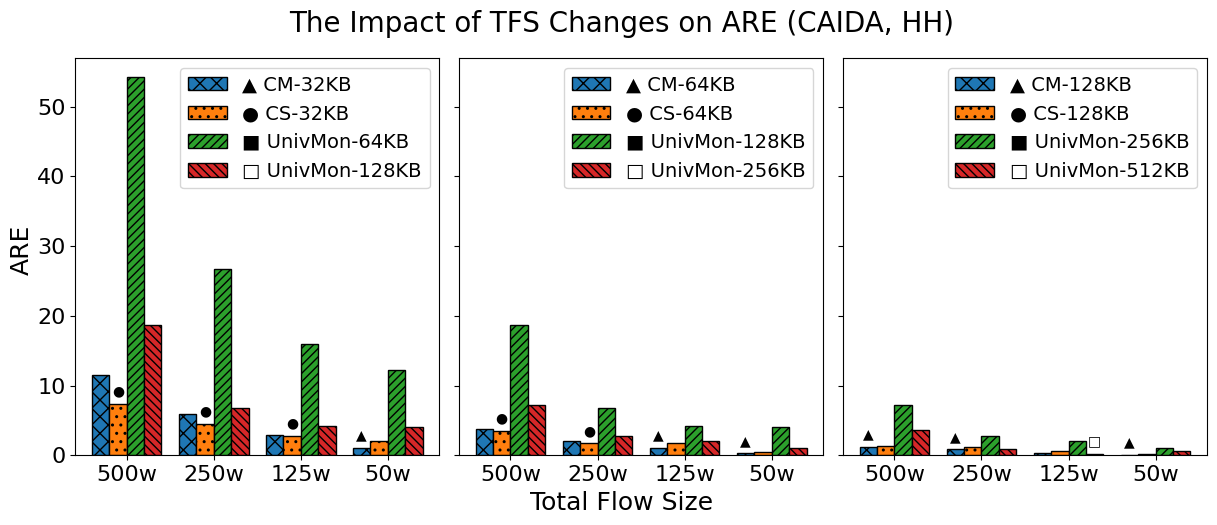

In [33]:
def plot_hh_with_diff_tfs():
    # mems = ['16KB', '32KB', '64KB']
    mems = ['32KB', '64KB', '128KB']
    univ_mems = ['64KB', '128KB', '256KB', '512KB']
    # mems = ['16KB','32KB', '64KB','128KB']
    x_ticks = ['500w', '250w', '125w', '50w']
    ## hh 
    res = {}
    for i, key in enumerate(mems):
        res[key] = []
        CM_ARE = []
        CS_ARE = []
        UNIV_ARE = []
        UNIV_ARE2 = []
        # RE_ARE = []
        hh_res = prepare_hh_dict(key)
        hh_res2 = prepare_hh_dict(univ_mems[i])
        hh_res3 = prepare_hh_dict(univ_mems[i+1])
        for pcap1 in caida:
            CM_ARE.append(hh_res[pcap1][0])
            CS_ARE.append(hh_res[pcap1][1])
            UNIV_ARE.append(hh_res2[pcap1][2])
            UNIV_ARE2.append(hh_res3[pcap1][2])
            # RE_ARE.append(min(hh_res[pcap1][0],hh_res[pcap1][1]))
            
        res[key].append(CM_ARE)
        res[key].append(CS_ARE)
        res[key].append(UNIV_ARE)
        res[key].append(UNIV_ARE2)
        # res[key].append(RE_ARE) 
        
            
    
    # Plot bar graph
    # plt.figure(figsize=(8, 6))
    # Create subplots
    fig, axs = plt.subplots(1, len(mems), figsize=(4*(len(mems)), 5), sharey=True)
    # fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    hatches = ['//', 'XX', '']
    
    for i, ax in enumerate(axs):
        key = mems[i]
        # ax.set_title(f'MEM = {key}', fontsize=16)
        ax.bar(np.arange(len(x_ticks)) - 0.3, res[key][0], width=0.2, label=f'\u25B2 CM-{key}', hatch='XX', color=colors[0], edgecolor='black')
        ax.bar(np.arange(len(x_ticks)) - 0.1, res[key][1], width=0.2, label=f'\u25CF CS-{key}', hatch='..', color=colors[1], edgecolor='black')
        ax.bar(np.arange(len(x_ticks)) + 0.1, res[key][2], width=0.2, label=f'\u25A0 UnivMon-{univ_mems[i]}', hatch='////', color=colors[2], edgecolor='black')
        ax.bar(np.arange(len(x_ticks)) + 0.3, res[key][3], width=0.2, label=f'\u25A1 UnivMon-{univ_mems[i+1]}', hatch='\\\\\\\\', color=colors[3], edgecolor='black')
        
        # ax.bar(np.arange(len(x_ticks)) + 0.4, res[key][2], width=0.2, label=f'ReConfig-{key}', hatch='', color=colors[i], edgecolor='black')
        for j, (val1, val2, val3, val4) in enumerate(zip(res[key][0], res[key][1], res[key][2], res[key][3])):
            min_val = min(val1, val2, val3, val4)
            if val1 == min_val:  # Check if CS-Only value is less than CM-Only value
                ax.text(j - 0.3, val1 + 0.8, '\u25B2', ha='center', va='bottom', fontsize=10, color='black')
            elif val2 == min_val:
                ax.text(j - 0.1, val2 + 0.8, '\u25CF', ha='center', va='bottom', fontsize=10, color='black')
            elif val3 == min_val:
                ax.text(j + 0.1, val3 + 0.8, '\u25A0', ha='center', va='bottom', fontsize=10, color='black')
            elif val4 == min_val:
                ax.text(j + 0.3, val4 + 0.8, '\u25A1', ha='center', va='bottom', fontsize=10, color='black')

    
        ax.set_xticks(np.arange(len(x_ticks)))
        ax.set_xticklabels(x_ticks)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        # ax.set_ytickpa(fontsize=18)
        ax.legend(fontsize=14)

    fig.text(0.5, -0.02, 'Total Flow Size', ha='center', fontsize=18)
    fig.text(-0.01, 0.5, 'ARE', va='center', rotation='vertical', fontsize=18)
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.suptitle('The Impact of TFS Changes on ARE (CAIDA, HH)', fontsize=20)
    
    plt.tight_layout()
    plt.show()   
        
plot_hh_with_diff_tfs()

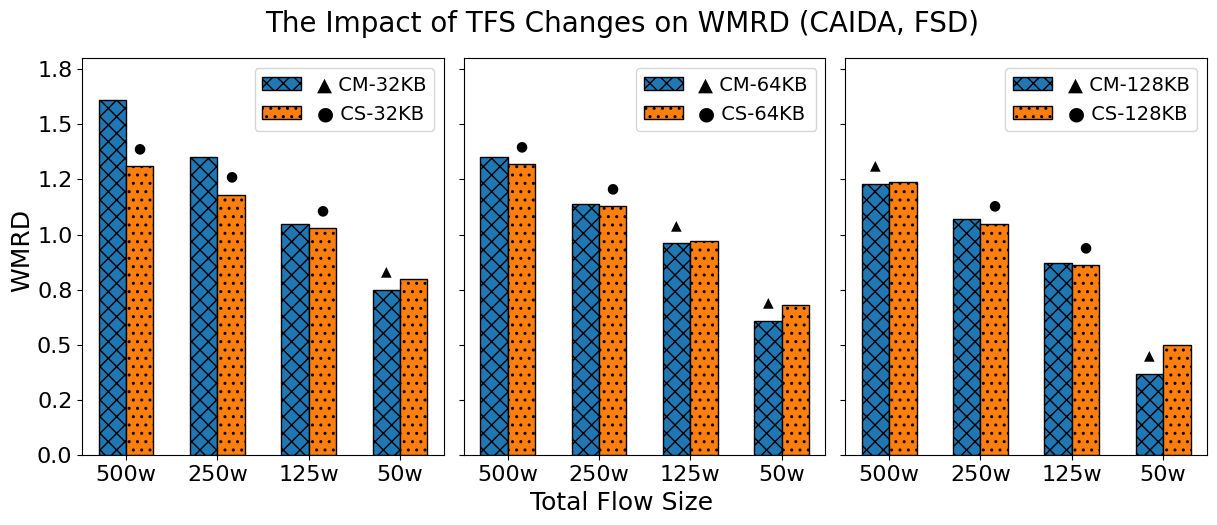

In [62]:
def plot_fsd_with_diff_tfs():
    # mems = ['64KB', '128KB','256KB']
    mems = ['32KB', '64KB', '128KB']
    x_ticks = ['500w', '250w', '125w', '50w']
    ## fsd 
    res = {}
    for i,key in enumerate(mems):
        res[key] = []
        CM_ARE = []
        CS_ARE = []
        fsd_res = prepare_fsd_dict(key)
        for pcap1 in caida:
            CM_ARE.append(fsd_res[pcap1][0])
            CS_ARE.append(fsd_res[pcap1][1])
            
        res[key].append(CM_ARE)
        res[key].append(CS_ARE)
        
            
    
    # Plot bar graph
    # plt.figure(figsize=(8, 6))
    # Create subplots
    fig, axs = plt.subplots(1, len(mems), figsize=(4*(len(mems)), 5), sharey=True)
    # fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    hatches = ['//', 'XX', '']
    
    for i, ax in enumerate(axs):
        key = mems[i]
        # ax.set_title(f'MEM = {key}', fontsize=16)
        ax.bar(np.arange(len(x_ticks)) - 0.15, res[key][0], width=0.3, label=f'\u25B2 CM-{key}', hatch='XX', color=colors[0], edgecolor='black')
        ax.bar(np.arange(len(x_ticks)) + 0.15, res[key][1], width=0.3, label=f'\u25CF CS-{key}', hatch='..', color=colors[1], edgecolor='black')
        
        # ax.bar(np.arange(len(x_ticks)) + 0.4, res[key][2], width=0.2, label=f'ReConfig-{key}', hatch='', color=colors[i], edgecolor='black')
        for j, (val1, val2) in enumerate(zip(res[key][0], res[key][1])):
            min_val = min(val1, val2)
            if val1 == min_val:  # Check if CS-Only value is less than CM-Only value
                ax.text(j - 0.15, val1 + 0.05, '\u25B2', ha='center', va='bottom', fontsize=10, color='black')
            elif val2 == min_val:
                ax.text(j + 0.15, val2 + 0.05, '\u25CF', ha='center', va='bottom', fontsize=10, color='black')

    
        ax.set_xticks(np.arange(len(x_ticks)))
        ax.set_xticklabels(x_ticks)
        ax.set_ylim(0, 1.8)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        # ax.set_ytickpa(fontsize=18)
        ax.legend(fontsize=14)

    fig.text(0.5, -0.02, 'Total Flow Size', ha='center', fontsize=18)
    fig.text(-0.01, 0.5, 'WMRD', va='center', rotation='vertical', fontsize=18)
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.suptitle('The Impact of TFS Changes on WMRD (CAIDA, FSD)', fontsize=20)
    
    plt.tight_layout()
    plt.show()   
        
plot_fsd_with_diff_tfs()

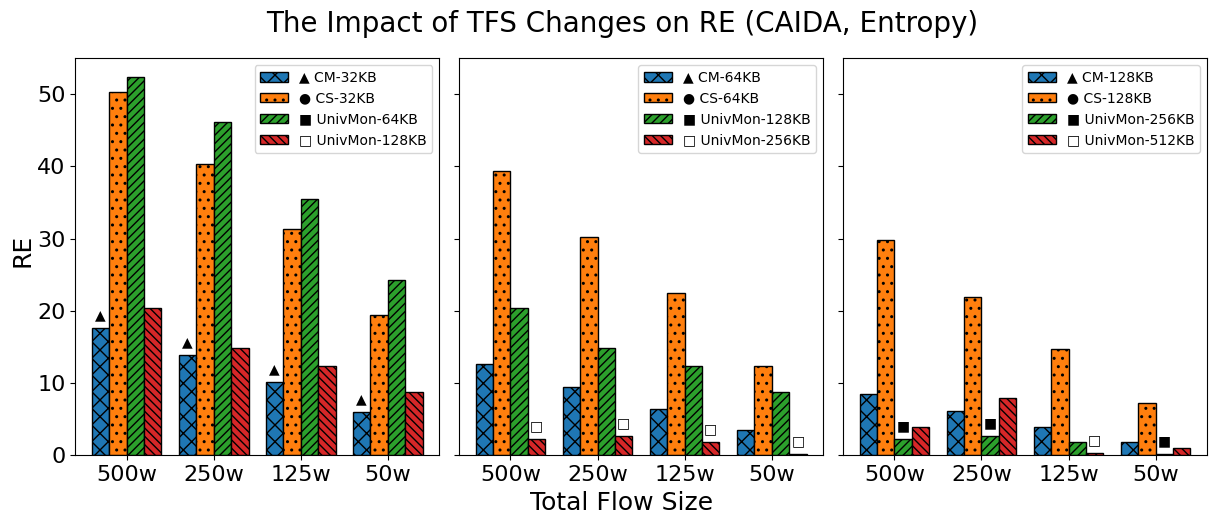

In [39]:
def plot_ent_with_diff_tfs():
    # mems = ['16KB', '32KB', '64KB']
    # mems = ['128KB','256KB','512KB']
    mems = ['32KB', '64KB','128KB']
    univ_mems = ['64KB','128KB','256KB','512KB']
    # univ_mems = ['64KB','128KB','256KB']
    x_ticks = ['500w', '250w', '125w', '50w']
    ## ent 
    res = {}
    for i, key in enumerate(mems):
        res[key] = []
        CM_ARE = []
        CS_ARE = []
        UNIV_ARE = []
        UNIV_ARE2 = []
        # RE_ARE = []
        ent_res = prepare_ent_dict(key)
        ent_res2 = prepare_ent_dict(univ_mems[i])
        ent_res3 = prepare_ent_dict(univ_mems[i+1])
        for pcap1 in caida:
            CM_ARE.append(ent_res[pcap1][0])
            CS_ARE.append(ent_res[pcap1][1])
            UNIV_ARE.append(ent_res2[pcap1][2])
            UNIV_ARE2.append(ent_res3[pcap1][2])
            # RE_ARE.append(min(ent_res[pcap1][0],ent_res[pcap1][1]))
            
        res[key].append(CM_ARE)
        res[key].append(CS_ARE)
        res[key].append(UNIV_ARE)
        res[key].append(UNIV_ARE2)
        # res[key].append(RE_ARE) 
            
    
    # Plot bar graph
    # plt.figure(figsize=(8, 6))
    # Create subplots
    fig, axs = plt.subplots(1, len(mems), figsize=(4*(len(mems)), 5), sharey=True)
    # fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    hatches = ['//', 'XX', '']
    
    for i, ax in enumerate(axs):
        key = mems[i]
        # ax.set_title(f'MEM = {key}', fontsize=16)
        ax.bar(np.arange(len(x_ticks)) - 0.3, res[key][0], width=0.2, label=f'\u25B2 CM-{key}', hatch='XX', color=colors[0], edgecolor='black')
        ax.bar(np.arange(len(x_ticks)) - 0.1, res[key][1], width=0.2, label=f'\u25CF CS-{key}', hatch='..', color=colors[1], edgecolor='black')
        ax.bar(np.arange(len(x_ticks)) + 0.1, res[key][2], width=0.2, label=f'\u25A0 UnivMon-{univ_mems[i]}', hatch='////', color=colors[2], edgecolor='black')
        ax.bar(np.arange(len(x_ticks)) + 0.3, res[key][3], width=0.2, label=f'\u25A1 UnivMon-{univ_mems[i+1]}', hatch='\\\\\\\\', color=colors[3], edgecolor='black')
        
        # ax.bar(np.arange(len(x_ticks)) + 0.4, res[key][2], width=0.2, label=f'ReConfig-{key}', hatch='', color=colors[i], edgecolor='black')
        for j, (val1, val2, val3, val4) in enumerate(zip(res[key][0], res[key][1], res[key][2], res[key][3])):
            min_val = min(val1, val2, val3, val4)
            if val1 == min_val:  # Check if CS-Only value is less than CM-Only value
                ax.text(j - 0.3, val1 + 0.8, '\u25B2', ha='center', va='bottom', fontsize=10, color='black')
            elif val2 == min_val:
                ax.text(j - 0.1, val2 + 0.8, '\u25CF', ha='center', va='bottom', fontsize=10, color='black')
            elif val3 == min_val:
                ax.text(j + 0.1, val3 + 0.8, '\u25A0', ha='center', va='bottom', fontsize=10, color='black')
            elif val4 == min_val:
                ax.text(j + 0.3, val4 + 0.8, '\u25A1', ha='center', va='bottom', fontsize=10, color='black')

    
        ax.set_xticks(np.arange(len(x_ticks)))
        ax.set_xticklabels(x_ticks)
        ax.xaxis.set_tick_params(labelsize=16)
        ax.yaxis.set_tick_params(labelsize=16)
        # ax.yaxis.set_major_formatter(FormatStrFormatter('%'))
        # ax.set_ytickpa(fontsize=18)
        ax.legend(fontsize=10)

    fig.text(0.5, -0.02, 'Total Flow Size', ha='center', fontsize=18)
    fig.text(-0.01, 0.5, 'RE', va='center', rotation='vertical', fontsize=18)
    # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    plt.suptitle('The Impact of TFS Changes on RE (CAIDA, Entropy)', fontsize=20)
    
    plt.tight_layout()
    plt.show()   
        
plot_ent_with_diff_tfs()

#### Fixed TFS, Changes FSD

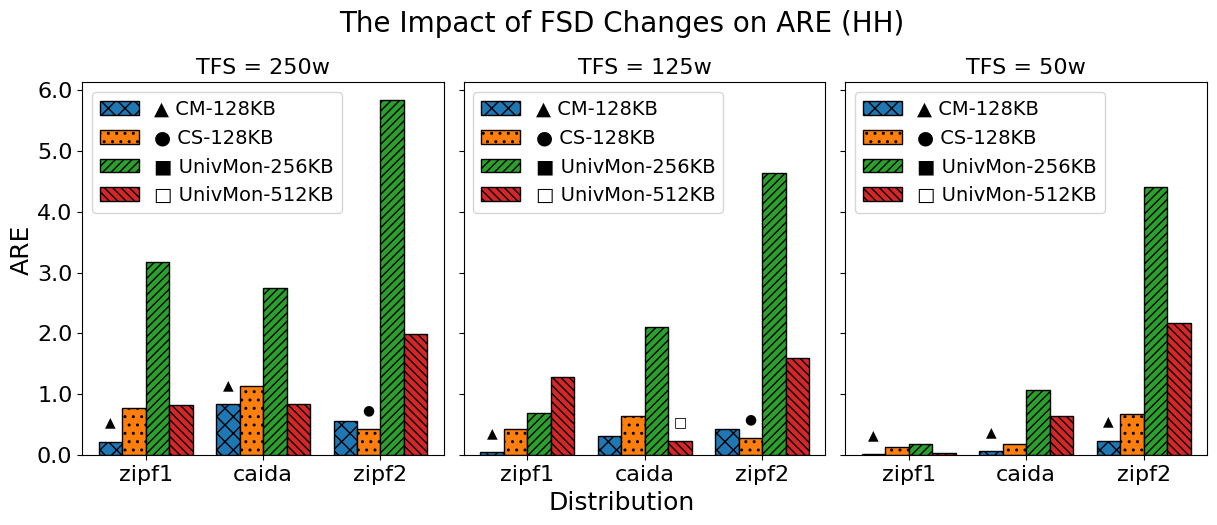

In [72]:
def plot_hh_with_diff_fsd():
    # mems = ['32KB', '64KB', '128KB']
    # univ_mems = ['64KB', '128KB', '256KB', '512KB']
    mems = ['128KB']
    univ_mems = ['256KB', '512KB']
    tfss = ['250w', '125w', '50w']
    x_ticks = ['zipf1', 'caida', 'zipf2']
    ## hh 
    res = {}
    for i, key in enumerate(mems):
        res[key] = {}
        for tfs in tfss:
            res[key][tfs] = []
            CM_ARE = []
            CS_ARE = []
            UNIV_ARE = []
            UNIV_ARE2 = []
            # RE_ARE = []
            hh_res = prepare_hh_dict(key)
            hh_res2 = prepare_hh_dict(univ_mems[i])
            hh_res3 = prepare_hh_dict(univ_mems[i+1])
            for pcap1 in x_ticks:
                CM_ARE.append(hh_res[f'{pcap1}-{tfs}'][0])
                CS_ARE.append(hh_res[f'{pcap1}-{tfs}'][1])
                UNIV_ARE.append(hh_res2[f'{pcap1}-{tfs}'][2])
                UNIV_ARE2.append(hh_res3[f'{pcap1}-{tfs}'][2])
                # RE_ARE.append(min(hh_res[f'{pcap1}-{tfs}'][0],hh_res[f'{pcap1}-{tfs}'][1]))
            
            res[key][tfs].append(CM_ARE)
            res[key][tfs].append(CS_ARE)
            res[key][tfs].append(UNIV_ARE)
            res[key][tfs].append(UNIV_ARE2)
            # res[key][tfs].append(RE_ARE)     
            
    
    # Plot bar graph
    # Create subplots
    for mem, single_res in res.items():
        fig, axs = plt.subplots(1, len(tfss), figsize=(4*(len(tfss)), 5), sharey=True)
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
        colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
        hatches = ['//', 'XX', '']
        
        for i, ax in enumerate(axs):
            ax.set_title(f'TFS = {tfss[i]}', fontsize=16)
            ax.bar(np.arange(len(x_ticks)) - 0.3, single_res[tfss[i]][0], width=0.2, label=f'\u25B2 CM-{mem}', hatch='XX', color=colors[0], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) - 0.1, single_res[tfss[i]][1], width=0.2, label=f'\u25CF CS-{mem}', hatch='..', color=colors[1], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.1, single_res[tfss[i]][2], width=0.2, label=f'\u25A0 UnivMon-{univ_mems[mems.index(mem)]}', hatch='////', color=colors[2], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.3, single_res[tfss[i]][3], width=0.2, label=f'\u25A1 UnivMon-{univ_mems[mems.index(mem)+1]}', hatch='\\\\\\\\', color=colors[3], edgecolor='black')
            # ax.bar(np.arange(len(x_ticks)) + 0.4, single_res[tfss[i]][2], width=0.15, label=f'ReConfig-{mem}', hatch='', color=colors[i], edgecolor='black')
            
            max_val = 0
            for j, (val1, val2, val3, val4) in enumerate(zip(single_res[tfss[i]][0], single_res[tfss[i]][1], single_res[tfss[i]][2], single_res[tfss[i]][3])):
                min_val = min(val1, val2, val3, val4)
                max_val = max(val1, val2, val3, val4, max_val)
                if val1 == min_val:  # Check if CS-Only value is less than CM-Only value
                    ax.text(j - 0.3, val1 + 0.2, '\u25B2', ha='center', va='bottom', fontsize=10, color='black')
                elif val2 == min_val:
                    ax.text(j - 0.1, val2 + 0.2, '\u25CF', ha='center', va='bottom', fontsize=10, color='black')
                elif val3 == min_val:
                    ax.text(j + 0.1, val3 + 0.2, '\u25A0', ha='center', va='bottom', fontsize=10, color='black')
                elif val4 == min_val:
                    ax.text(j + 0.3, val4 + 0.2, '\u25A1', ha='center', va='bottom', fontsize=10, color='black')

        
            ax.set_xticks(np.arange(len(x_ticks)))
            ax.set_xticklabels(x_ticks)
            ax.xaxis.set_tick_params(labelsize=16)
            ax.yaxis.set_tick_params(labelsize=16)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            # ax.set_ylim(0, max_val*1.2)
            ax.legend(fontsize=14, loc='upper left')

        fig.text(0.5, -0.02, 'Distribution', ha='center', fontsize=18)
        fig.text(-0.01, 0.5, 'ARE', va='center', rotation='vertical', fontsize=18)
        # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.suptitle(f'The Impact of FSD Changes on ARE (HH)', fontsize=20)
        
        plt.tight_layout()
        plt.show()   
        
plot_hh_with_diff_fsd()

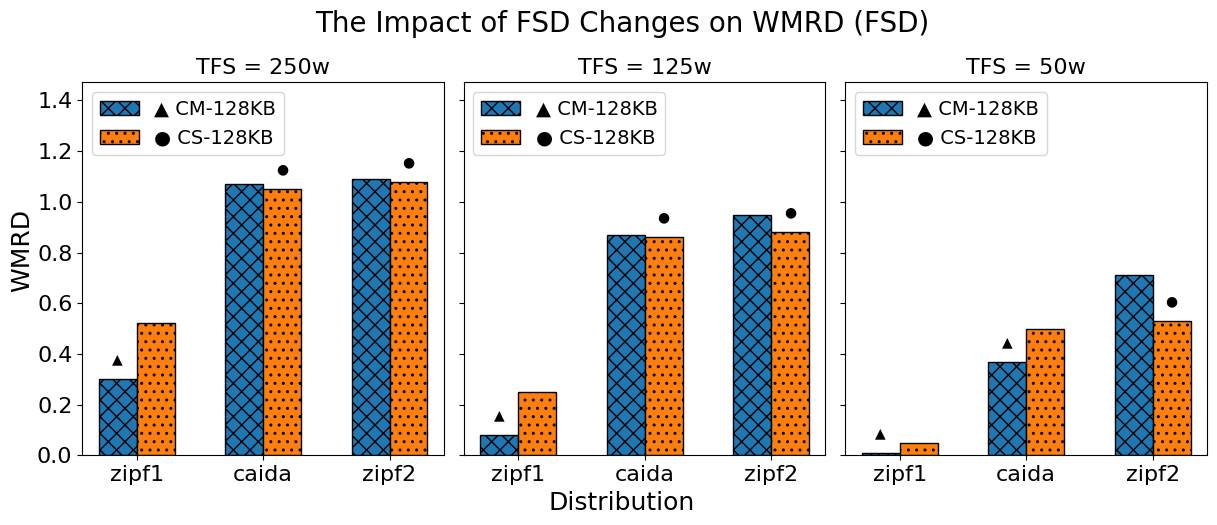

In [71]:
def plot_fsd_with_diff_tfs():
    # mems = ['64KB', '128KB', '256KB']
    mems = ['128KB']
    tfss = ['250w', '125w', '50w']
    x_ticks = ['zipf1', 'caida', 'zipf2']
    ## fsd 
    res = {}
    for i, key in enumerate(mems):
        res[key] = {}
        for tfs in tfss:
            res[key][tfs] = []
            CM_ARE = []
            CS_ARE = []
            # RE_ARE = []
            fsd_res = prepare_fsd_dict(key)
            for pcap1 in x_ticks:
                CM_ARE.append(fsd_res[f'{pcap1}-{tfs}'][0])
                CS_ARE.append(fsd_res[f'{pcap1}-{tfs}'][1])
                # RE_ARE.append(min(fsd_res[f'{pcap1}-{tfs}'][0],fsd_res[f'{pcap1}-{tfs}'][1]))
            
            res[key][tfs].append(CM_ARE)
            res[key][tfs].append(CS_ARE)
            
    
    # Plot bar graph
    # Create subplots
    for mem, single_res in res.items():
        fig, axs = plt.subplots(1, len(tfss), figsize=(4*(len(tfss)), 5), sharey=True)
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
        colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
        hatches = ['//', 'XX', '']
        
        for i, ax in enumerate(axs):
            ax.set_title(f'TFS = {tfss[i]}', fontsize=16)
            ax.bar(np.arange(len(x_ticks)) - 0.15, single_res[tfss[i]][0], width=0.3, label=f'\u25B2 CM-{mem}', hatch='XX', color=colors[0], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.15, single_res[tfss[i]][1], width=0.3, label=f'\u25CF CS-{mem}', hatch='..', color=colors[1], edgecolor='black')
            # ax.bar(np.arange(len(x_ticks)) + 0.4, single_res[tfss[i]][2], width=0.15, label=f'ReConfig-{mem}', hatch='', color=colors[i], edgecolor='black')
            
            max_val = 0
            for j, (val1, val2) in enumerate(zip(single_res[tfss[i]][0], single_res[tfss[i]][1])):
                min_val = min(val1, val2)
                max_val = max(val1, val2, max_val)
                if val1 == min_val:  # Check if CS-Only value is less than CM-Only value
                    ax.text(j - 0.15, val1 + 0.05, '\u25B2', ha='center', va='bottom', fontsize=10, color='black')
                elif val2 == min_val:
                    ax.text(j + 0.15, val2 + 0.05, '\u25CF', ha='center', va='bottom', fontsize=10, color='black')

            ax.set_xticks(np.arange(len(x_ticks)))
            ax.set_xticklabels(x_ticks)
            ax.xaxis.set_tick_params(labelsize=16)
            ax.yaxis.set_tick_params(labelsize=16)
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            if i == 0:
                ax.set_ylim(0, max_val*1.35)
            ax.legend(fontsize=14, loc='upper left')

        fig.text(0.5, -0.02, 'Distribution', ha='center', fontsize=18)
        fig.text(-0.01, 0.5, 'WMRD', va='center', rotation='vertical', fontsize=18)
        # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.suptitle(f'The Impact of FSD Changes on WMRD (FSD)', fontsize=20)
        # plt.legend()
        
        plt.tight_layout()
        plt.show()   
        
plot_fsd_with_diff_tfs()

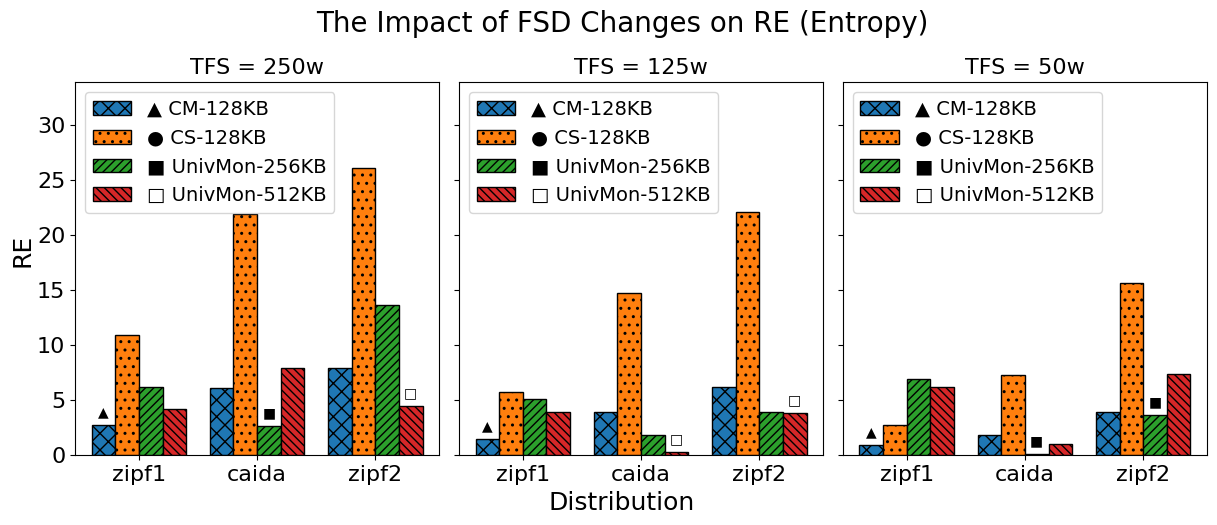

In [70]:
def plot_ent_with_diff_tfs():
    # mems = ['32KB', '64KB', '128KB']
    # univ_mems = ['128KB', '256KB', '512KB']
    mems = ['128KB']
    univ_mems = ['256KB', '512KB']
    tfss = ['250w', '125w', '50w']
    x_ticks = ['zipf1', 'caida', 'zipf2']
    ## ent 
    res = {}
    for i, key in enumerate(mems):
        res[key] = {}
        for tfs in tfss:
            res[key][tfs] = []
            CM_ARE = []
            CS_ARE = []
            UNIV_ARE = []
            UNIV_ARE2 = []
            # RE_ARE = []
            ent_res = prepare_ent_dict(key)
            ent_res2 = prepare_ent_dict(univ_mems[i])
            ent_res3 = prepare_ent_dict(univ_mems[i+1])
            for pcap1 in x_ticks:
                CM_ARE.append(ent_res[f'{pcap1}-{tfs}'][0])
                CS_ARE.append(ent_res[f'{pcap1}-{tfs}'][1])
                UNIV_ARE.append(ent_res2[f'{pcap1}-{tfs}'][2])
                UNIV_ARE2.append(ent_res3[f'{pcap1}-{tfs}'][2])
                # RE_ARE.append(min(ent_res[f'{pcap1}-{tfs}'][0],ent_res[f'{pcap1}-{tfs}'][1]))
            
            res[key][tfs].append(CM_ARE)
            res[key][tfs].append(CS_ARE)
            res[key][tfs].append(UNIV_ARE)
            res[key][tfs].append(UNIV_ARE2)
            # res[key][tfs].append(RE_ARE)     
            
    
    # Plot bar graph
    # Create subplots
    for mem, single_res in res.items():
        fig, axs = plt.subplots(1, len(tfss), figsize=(4*(len(tfss)), 5), sharey=True)
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
        colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
        hatches = ['//', 'XX', '']
        
        for i, ax in enumerate(axs):
            ax.set_title(f'TFS = {tfss[i]}', fontsize=16)
            ax.bar(np.arange(len(x_ticks)) - 0.3, single_res[tfss[i]][0], width=0.2, label=f'\u25B2 CM-{mem}', hatch='XX', color=colors[0], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) - 0.1, single_res[tfss[i]][1], width=0.2, label=f'\u25CF CS-{mem}', hatch='..', color=colors[1], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.1, single_res[tfss[i]][2], width=0.2, label=f'\u25A0 UnivMon-{univ_mems[mems.index(mem)]}', hatch='////', color=colors[2], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.3, single_res[tfss[i]][3], width=0.2, label=f'\u25A1 UnivMon-{univ_mems[mems.index(mem)+1]}', hatch='\\\\\\\\', color=colors[3], edgecolor='black')
            # ax.bar(np.arange(len(x_ticks)) + 0.4, single_res[tfss[i]][2], width=0.15, label=f'ReConfig-{mem}', hatch='', color=colors[i], edgecolor='black')
            
            max_val = 0
            for j, (val1, val2, val3, val4) in enumerate(zip(single_res[tfss[i]][0], single_res[tfss[i]][1], single_res[tfss[i]][2], single_res[tfss[i]][3])):
                min_val = min(val1, val2, val3, val4)
                max_val = max(val1, val2, val3, val4, max_val)
                if val1 == min_val:  # Check if CS-Only value is less than CM-Only value
                    ax.text(j - 0.3, val1 + 0.5, '\u25B2', ha='center', va='bottom', fontsize=10, color='black')
                elif val2 == min_val:
                    ax.text(j - 0.1, val2 + 0.5, '\u25CF', ha='center', va='bottom', fontsize=10, color='black')
                elif val3 == min_val:
                    ax.text(j + 0.1, val3 + 0.5, '\u25A0', ha='center', va='bottom', fontsize=10, color='black')
                elif val4 == min_val:
                    ax.text(j + 0.3, val4 + 0.5, '\u25A1', ha='center', va='bottom', fontsize=10, color='black')

        
            ax.set_xticks(np.arange(len(x_ticks)))
            ax.set_xticklabels(x_ticks)
            ax.xaxis.set_tick_params(labelsize=16)
            ax.yaxis.set_tick_params(labelsize=16)
            # ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            if i == 0:
                ax.set_ylim(0, max_val*1.3)
            ax.legend(fontsize=14, loc='upper left')

        fig.text(0.5, -0.02, 'Distribution', ha='center', fontsize=18)
        fig.text(-0.01, 0.5, 'RE', va='center', rotation='vertical', fontsize=18)
        # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.suptitle(f'The Impact of FSD Changes on RE (Entropy)', fontsize=20)
        # plt.legend()
        
        plt.tight_layout()
        plt.show()   
        
plot_ent_with_diff_tfs()

---

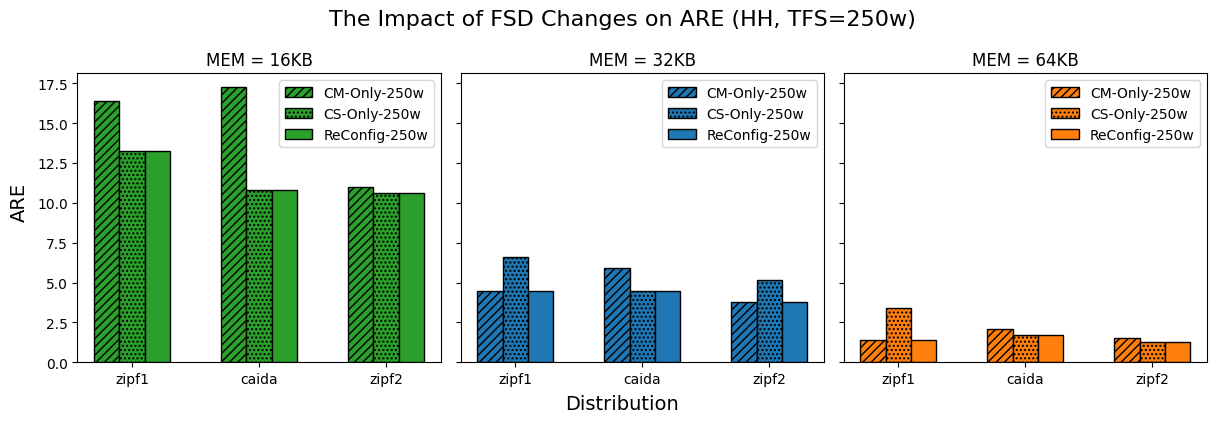

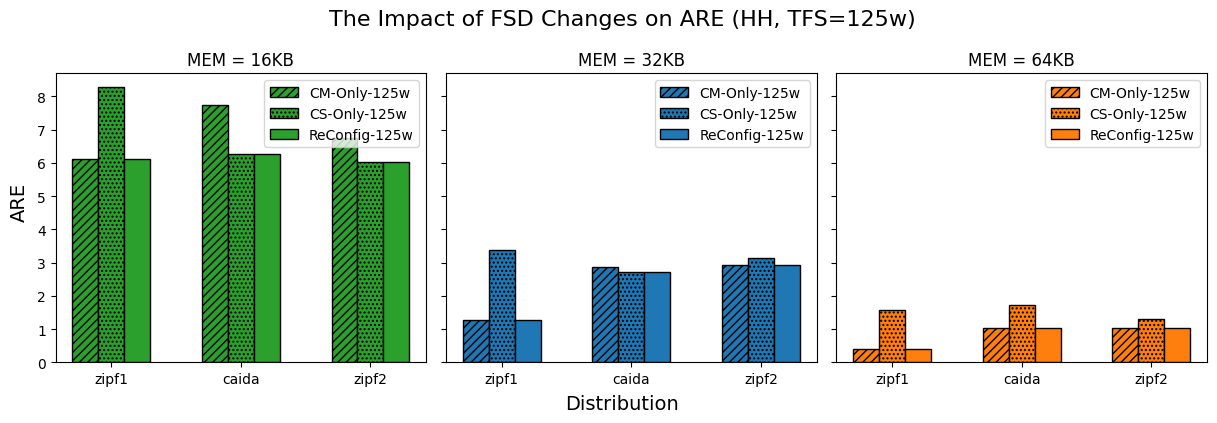

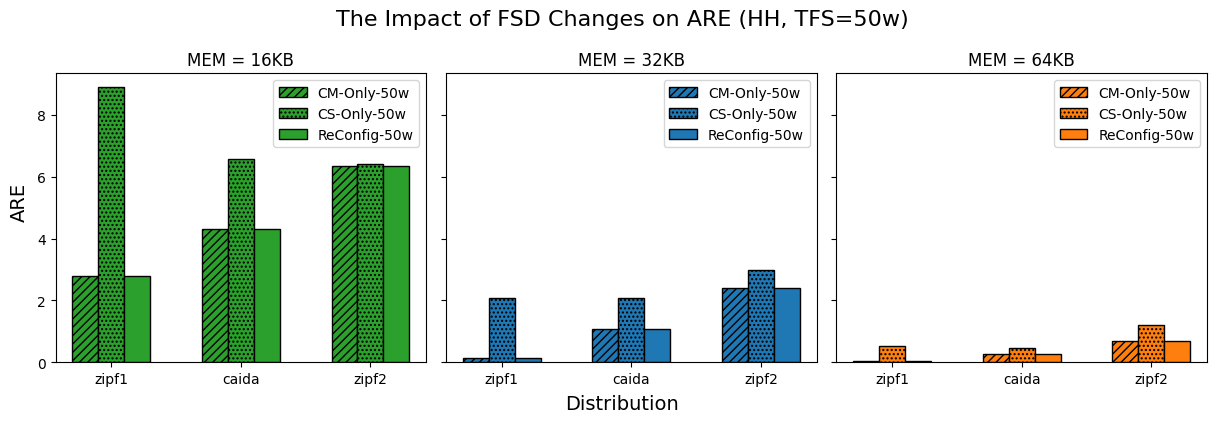

In [70]:
def plot_hh_with_diff_fsd():
    mems = ['16KB', '32KB', '64KB']
    # mems = ['16KB']
    tfss = ['250w', '125w', '50w']
    x_ticks = ['zipf1', 'caida', 'zipf2']
    ## hh 
    res = {}
    labels = []
    for tfs in tfss:
        res[tfs] = {}
        for key in mems:
            res[tfs][key] = []
            CM_ARE = []
            CS_ARE = []
            RE_ARE = []
            hh_res = prepare_hh_dict(key)
            for pcap1 in x_ticks:
                CM_ARE.append(hh_res[f'{pcap1}-{tfs}'][0])
                CS_ARE.append(hh_res[f'{pcap1}-{tfs}'][1])
                RE_ARE.append(min(hh_res[f'{pcap1}-{tfs}'][0],hh_res[f'{pcap1}-{tfs}'][1]))
            
            res[tfs][key].append(CM_ARE)
            res[tfs][key].append(CS_ARE)
            res[tfs][key].append(RE_ARE)     
            
    
    # Plot bar graph
    # Create subplots
    for tfs, single_res in res.items():
        fig, axs = plt.subplots(1, len(tfss), figsize=(4*(len(tfss)), 4), sharey=True)
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
        colors = ['tab:green', 'tab:blue', 'tab:orange', 'tab:red']
        hatches = ['//', 'XX', '']
        
        for i, ax in enumerate(axs):
            ax.set_title(f'MEM = {mems[i]}')
            ax.bar(np.arange(len(x_ticks)), single_res[mems[i]][0], width=0.2, label=f'CM-Only-{tfs}', hatch='////', color=colors[i], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.2, single_res[mems[i]][1], width=0.2, label=f'CS-Only-{tfs}', hatch='....', color=colors[i], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.4, single_res[mems[i]][2], width=0.2, label=f'ReConfig-{tfs}', hatch='', color=colors[i], edgecolor='black')
            ax.set_xticks(np.arange(len(x_ticks)) + 0.2)
            ax.set_xticklabels(x_ticks)
            ax.legend()

        fig.text(0.5, -0.02, 'Distribution', ha='center', fontsize=14)
        fig.text(-0.01, 0.5, 'ARE', va='center', rotation='vertical', fontsize=14)
        # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.suptitle(f'The Impact of FSD Changes on ARE (HH, TFS={tfs})', fontsize=16)
        plt.legend(ncol=1)
        
        plt.tight_layout()
        plt.show()   
        
plot_hh_with_diff_fsd()

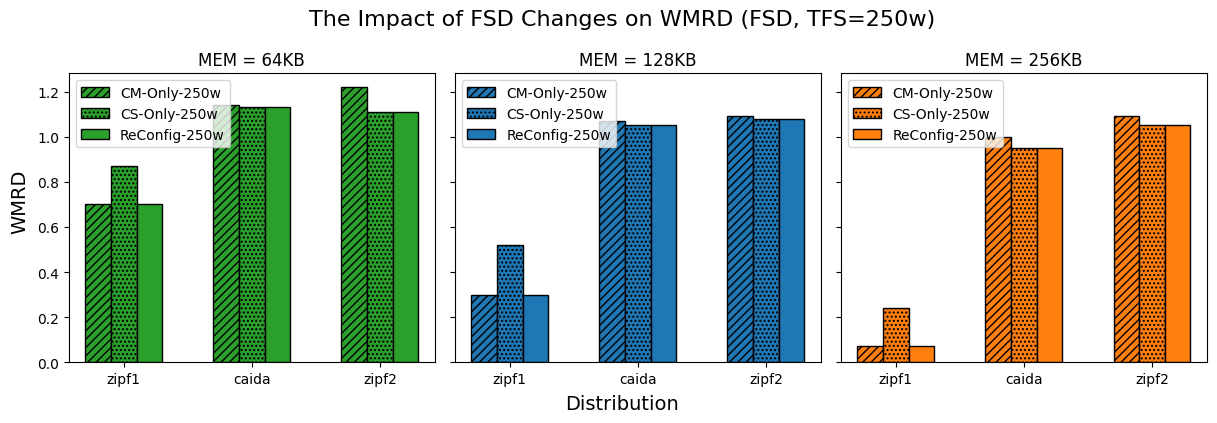

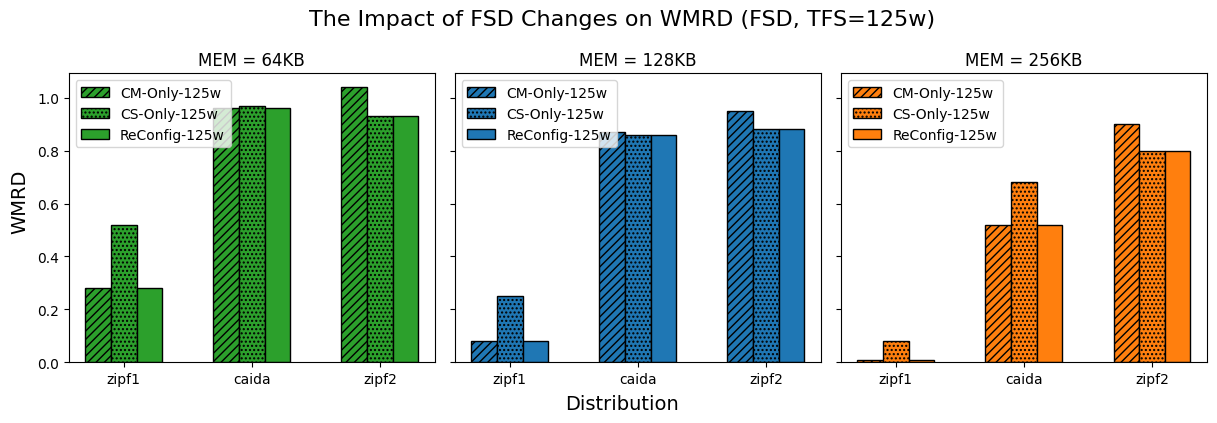

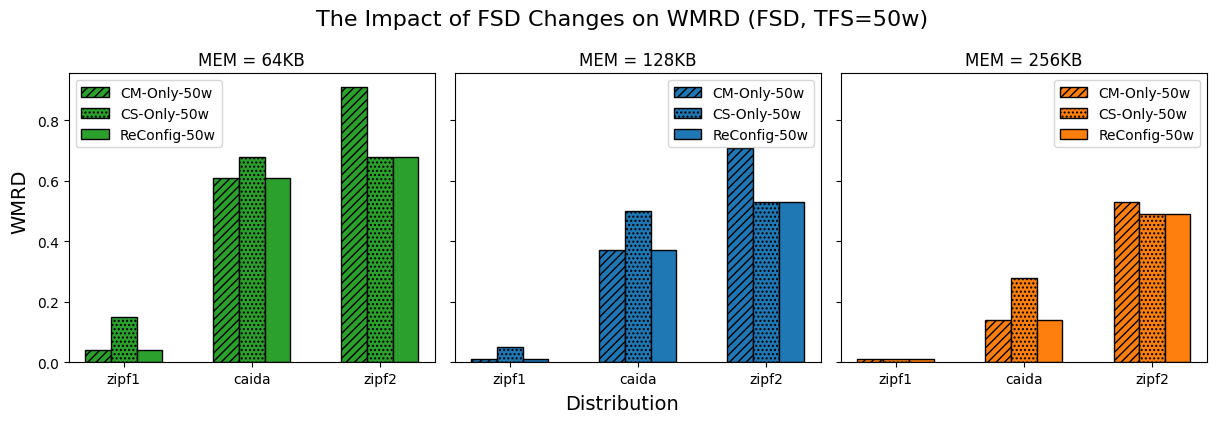

In [74]:
def plot_fsd_with_diff_fsd():
    mems = ['64KB','128KB', '256KB']
    # mems = ['16KB']
    tfss = ['250w', '125w', '50w']
    x_ticks = ['zipf1', 'caida', 'zipf2']
    ## fsd 
    res = {}
    labels = []
    for tfs in tfss:
        res[tfs] = {}
        for key in mems:
            res[tfs][key] = []
            CM_WMRD = []
            CS_WMRD = []
            RE_WMRD = []
            fsd_res = prepare_fsd_dict(key)
            for pcap1 in x_ticks:
                CM_WMRD.append(fsd_res[f'{pcap1}-{tfs}'][0])
                CS_WMRD.append(fsd_res[f'{pcap1}-{tfs}'][1])
                RE_WMRD.append(min(fsd_res[f'{pcap1}-{tfs}'][0],fsd_res[f'{pcap1}-{tfs}'][1]))
            
            res[tfs][key].append(CM_WMRD)
            res[tfs][key].append(CS_WMRD)
            res[tfs][key].append(RE_WMRD)     
            
    
    # Plot bar graph
    # Create subplots
    for tfs, single_res in res.items():
        fig, axs = plt.subplots(1, len(tfss), figsize=(4*(len(tfss)), 4), sharey=True)
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
        colors = ['tab:green', 'tab:blue', 'tab:orange', 'tab:red']
        hatches = ['//', 'XX', '']
        
        for i, ax in enumerate(axs):
            ax.set_title(f'MEM = {mems[i]}')
            ax.bar(np.arange(len(x_ticks)), single_res[mems[i]][0], width=0.2, label=f'CM-Only-{tfs}', hatch='////', color=colors[i], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.2, single_res[mems[i]][1], width=0.2, label=f'CS-Only-{tfs}', hatch='....', color=colors[i], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.4, single_res[mems[i]][2], width=0.2, label=f'ReConfig-{tfs}', hatch='', color=colors[i], edgecolor='black')
            ax.set_xticks(np.arange(len(x_ticks)) + 0.2)
            ax.set_xticklabels(x_ticks)
            ax.legend()

        fig.text(0.5, -0.02, 'Distribution', ha='center', fontsize=14)
        fig.text(-0.01, 0.5, 'WMRD', va='center', rotation='vertical', fontsize=14)
        # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.suptitle(f'The Impact of FSD Changes on WMRD (FSD, TFS={tfs})', fontsize=16)
        plt.legend(ncol=1)
        
        plt.tight_layout()
        plt.show()   
        
plot_fsd_with_diff_fsd()

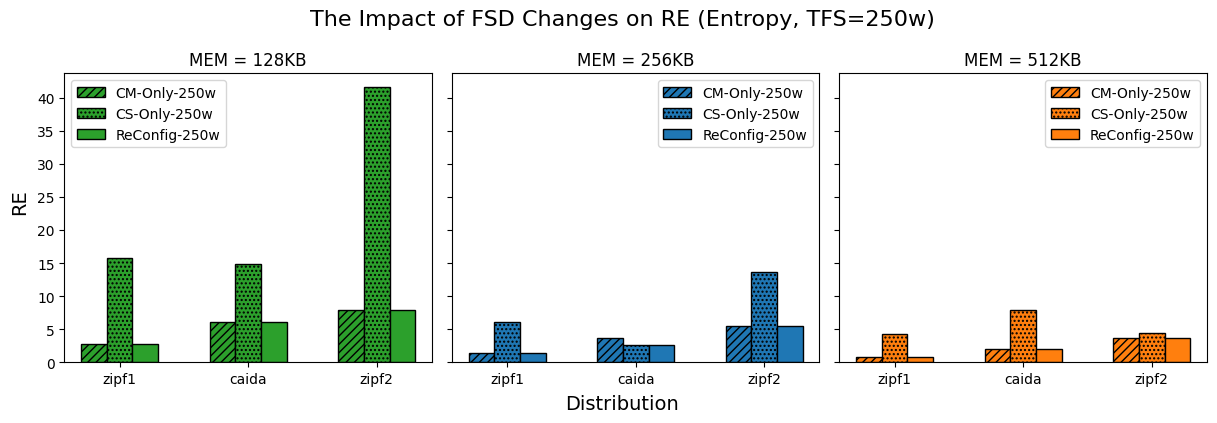

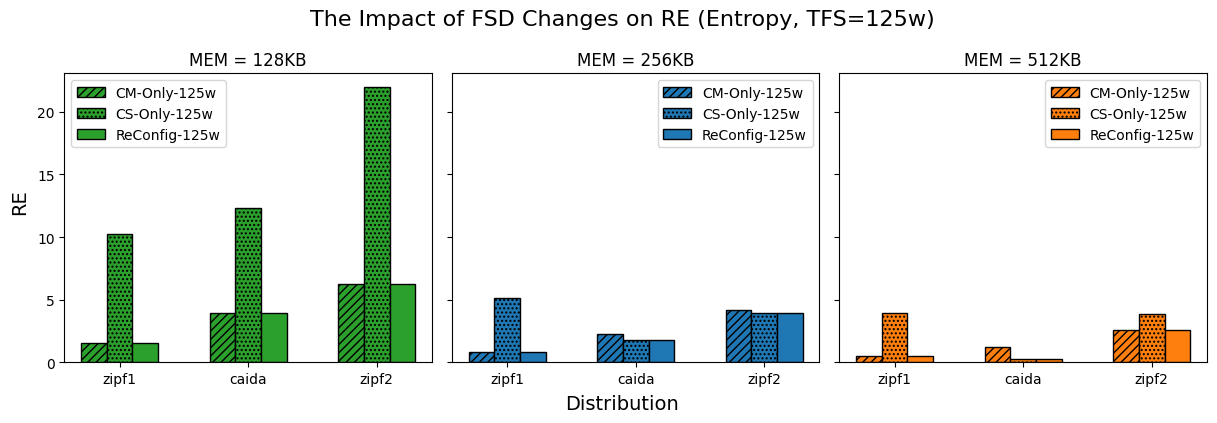

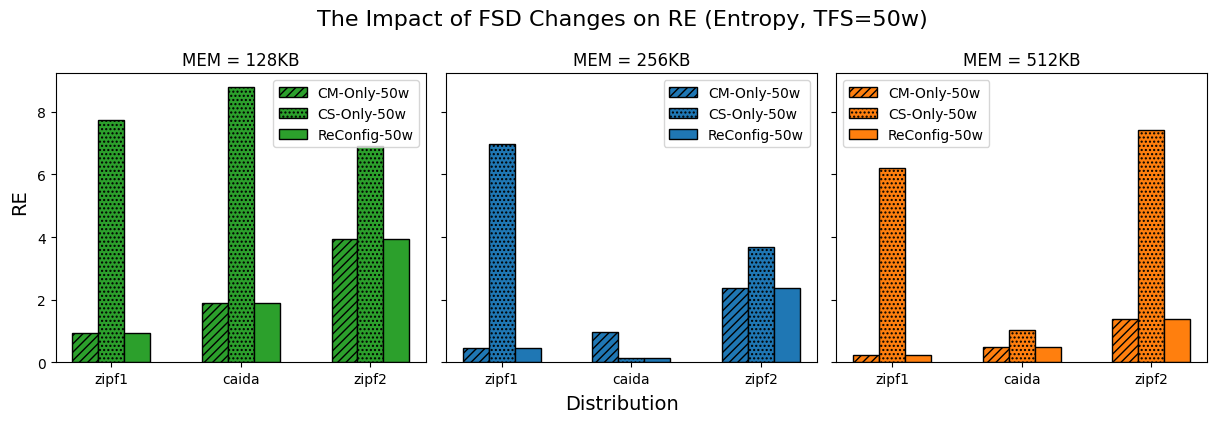

In [76]:
def plot_ent_with_diff_fsd():
    mems = ['128KB', '256KB', '512KB']
    # mems = ['16KB']
    tfss = ['250w', '125w', '50w']
    x_ticks = ['zipf1', 'caida', 'zipf2']
    ## ent 
    res = {}
    labels = []
    for tfs in tfss:
        res[tfs] = {}
        for key in mems:
            res[tfs][key] = []
            CM_RE = []
            CS_RE = []
            RE_RE = []
            ent_res = prepare_ent_dict(key)
            for pcap1 in x_ticks:
                CM_RE.append(ent_res[f'{pcap1}-{tfs}'][0])
                CS_RE.append(ent_res[f'{pcap1}-{tfs}'][2])
                RE_RE.append(min(ent_res[f'{pcap1}-{tfs}'][0],ent_res[f'{pcap1}-{tfs}'][2]))
            
            res[tfs][key].append(CM_RE)
            res[tfs][key].append(CS_RE)
            res[tfs][key].append(RE_RE)     
            
    
    # Plot bar graph
    # Create subplots
    for tfs, single_res in res.items():
        fig, axs = plt.subplots(1, len(tfss), figsize=(4*(len(tfss)), 4), sharey=True)
        # fig, axs = plt.subplots(1, 4, figsize=(16, 4), sharey=True)
        colors = ['tab:green', 'tab:blue', 'tab:orange', 'tab:red']
        hatches = ['//', 'XX', '']
        
        for i, ax in enumerate(axs):
            ax.set_title(f'MEM = {mems[i]}')
            ax.bar(np.arange(len(x_ticks)), single_res[mems[i]][0], width=0.2, label=f'CM-Only-{tfs}', hatch='////', color=colors[i], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.2, single_res[mems[i]][1], width=0.2, label=f'CS-Only-{tfs}', hatch='....', color=colors[i], edgecolor='black')
            ax.bar(np.arange(len(x_ticks)) + 0.4, single_res[mems[i]][2], width=0.2, label=f'ReConfig-{tfs}', hatch='', color=colors[i], edgecolor='black')
            ax.set_xticks(np.arange(len(x_ticks)) + 0.2)
            ax.set_xticklabels(x_ticks)
            ax.legend()

        fig.text(0.5, -0.02, 'Distribution', ha='center', fontsize=14)
        fig.text(-0.01, 0.5, 'RE', va='center', rotation='vertical', fontsize=14)
        # plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
        plt.suptitle(f'The Impact of FSD Changes on RE (Entropy, TFS={tfs})', fontsize=16)
        plt.legend(ncol=1)
        
        plt.tight_layout()
        plt.show()   
        
plot_ent_with_diff_fsd()